# Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

# Задачи до момента

1. Изберете dataset и направете data exploration
2. Опитайте да направите по-добри резултати от нас на Titanic
3. Опитайте да направите по-добри резултати от нас на Spooky Author Identification

Plot twist: deadline 27 ноември (понеделник)

Формат: repository в GitHub с три notebook-а.

# Unsupervised learning

* Clustering
* Dimensionality reduction

# k-Means Clustering

* Unsupervised learning алгоритъм
* Разделя dataset-а на `k` сходни групи, наречени клъстери

Да се пробваме с `make_blobs`:

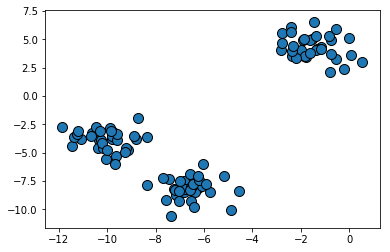

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
mglearn.discrete_scatter(X[:, 0], X[:, 1]);

Така изглежда само `X`, където няма информация за категориите.

In [3]:
X

array([[ -7.94152277e-01,   2.10495117e+00],
       [ -9.15155186e+00,  -4.81286449e+00],
       [ -1.14418263e+01,  -4.45781441e+00],
       [ -9.76761777e+00,  -3.19133737e+00],
       [ -4.53655648e+00,  -8.40186288e+00],
       [ -6.26302115e+00,  -8.10666081e+00],
       [ -6.38481234e+00,  -8.47302970e+00],
       [ -9.20490564e+00,  -4.57687928e+00],
       [ -2.76017908e+00,   5.55121358e+00],
       [ -1.17104176e+00,   4.33091816e+00],
       [ -1.00364080e+01,  -5.56912090e+00],
       [ -9.87589123e+00,  -2.82386464e+00],
       [ -7.17532921e+00,  -8.77059017e+00],
       [ -2.40671820e+00,   6.09894447e+00],
       [ -4.87418245e+00,  -1.00495890e+01],
       [ -6.07854700e+00,  -7.93969420e+00],
       [ -6.83238762e+00,  -7.47067670e+00],
       [ -2.34673261e+00,   3.56128423e+00],
       [ -1.03415662e+01,  -3.90975169e+00],
       [ -1.10926243e+01,  -3.78396611e+00],
       [ -6.50212109e+00,  -7.91249101e+00],
       [ -1.02639310e+01,  -3.92073400e+00],
       [ -

Ще се опитаме да открием нещо такова с k-Means clustering:

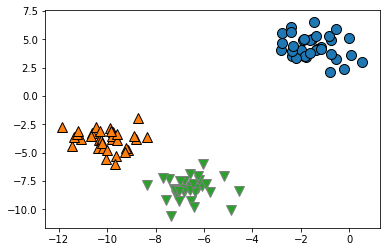

In [4]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y);

Кодът би трябвало да изглежда съвсем познато, освен че `fit` не примера `y`:

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Да начертаем резултатите:

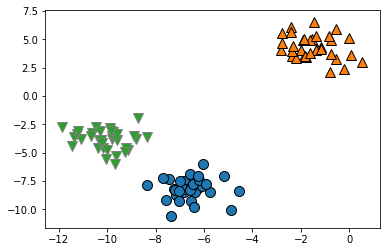

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_pred);

Изглежда сме намерили същите клъстери. Това значи ли, че `y == y_pred`?

In [7]:
y == y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [8]:
print(y)
print(y_pred)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


`y` и `y_pred` създават идентични разделения на данните, но номерацията им е различна.

В sklearn има метрика, която хваща това:

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(y, y_pred)

1.0

`adjusted_rand_score` има повече особености, но ще ги погледнем по-натам.

Как работи k-Means Clustering:

1. Алгоритъма избира $k$ произволни точки, наречени "центрове".
2. Всяка точка от dataset-а се "оцветява" спрямо най-близкия център.
3. Всеки център се премества до центъра на тежестта на точките от един цвят.
4. Стъпки 2-4 се повтарят докато не се получи стабилна позиция.

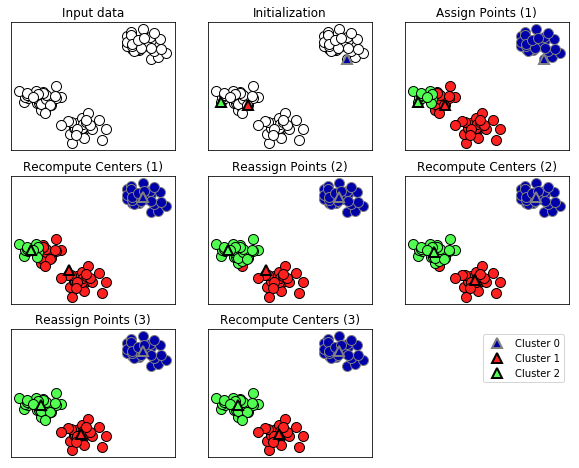

In [10]:
mglearn.plots.plot_kmeans_algorithm()

k-Means открива три центъра и класифицира всяка точка като член на клъстъра на най-близкия център.

In [11]:
kmeans.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

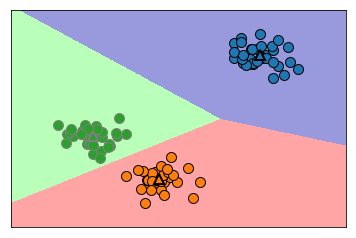

In [12]:
mglearn.plots.plot_kmeans_boundaries()

Един от параметрите на `KMeans` е колко клъстера да намери алгоритъма. Обърнете внимание, че той не знае колко клъстера има в данните.

Това е възможен отговор за `k=2`:

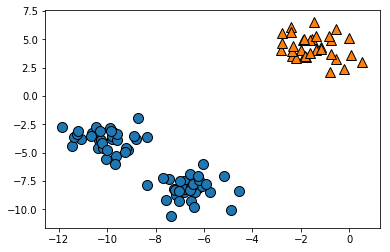

In [13]:
assignments = KMeans(n_clusters=2, random_state=0).fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments);

Това е възможен отговор за `k=5`:

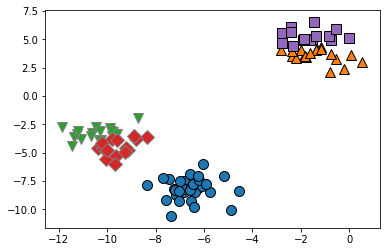

In [14]:
assignments = KMeans(n_clusters=5, random_state=0).fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments);

Един от проблемите на k-Means е че не може да се справи със всякаква форма на клъстерите. Например:

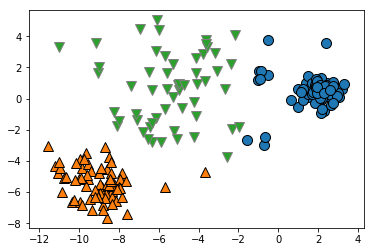

In [15]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred);

Вероятно по-добро разделение щеше да бъде гъстите региони бяха два от клъстерите и всичко между тях беше третия.

Ето и друг пример:

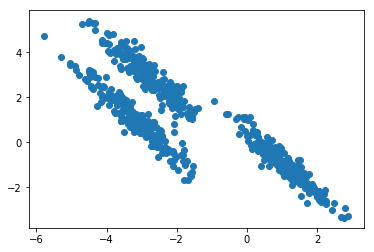

In [16]:
X, y = make_blobs(random_state=170, n_samples=600)
random = np.random.RandomState(74)
transformation = random.normal(size=(2, 2))
X = np.dot(X, transformation)

plt.scatter(X[:, 0], X[:, 1]);

Тук ясно се виждат три отделни клъстера. Но какво ли ще намери k-Means?

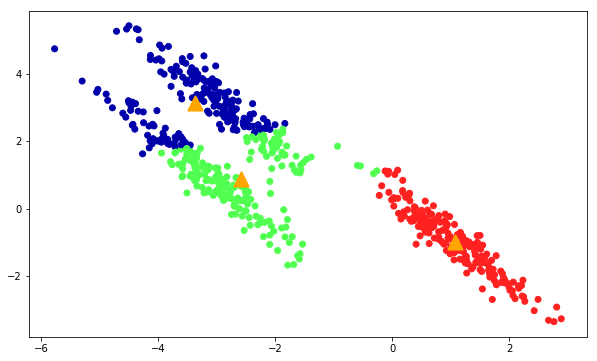

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='orange', s=200, linewidth=2);

Друго, с което k-Means няма да се справи добре е `make_moons`:

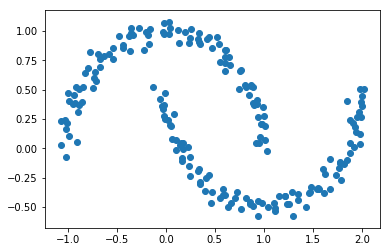

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

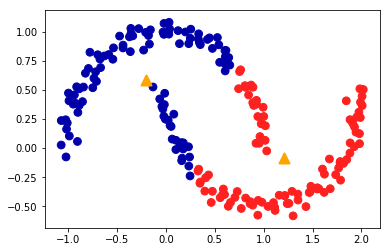

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='orange', s=100, linewidth=2);

## Aside

Бихме могли да ползваме k-Means за да подобрим резултати от линеен модел.

Какво бихме постигнали с линеен SVM?

In [20]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

model = make_pipeline(StandardScaler(), LinearSVC(C=10))
model.fit(X, y)
model.score(X, y)

0.88

А ако прекераме данни през k-Means при `k=10`?

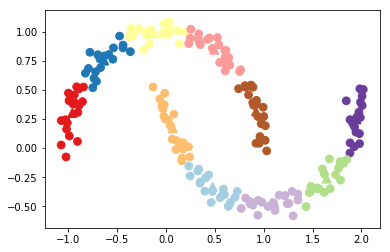

In [21]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X), s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired');

`KMeans` има метод `transform`, който връща дистанцията от центровете:

In [22]:
kmeans.transform(X)

array([[ 0.9220768 ,  1.46553151,  1.13956805, ...,  1.16559918,
         1.03852189,  0.23340263],
       [ 1.14159679,  2.51721597,  0.1199124 , ...,  0.70700803,
         2.20414144,  0.98271691],
       [ 0.78786246,  0.77354687,  1.74914157, ...,  1.97061341,
         0.71561277,  0.94399739],
       ..., 
       [ 0.44639122,  1.10631579,  1.48991975, ...,  1.79125448,
         1.03195812,  0.81205971],
       [ 1.38951924,  0.79790385,  1.98056306, ...,  1.97788956,
         0.23892095,  1.05774337],
       [ 1.14920754,  2.4536383 ,  0.04506731, ...,  0.57163262,
         2.11331394,  0.88166689]])

Така си създадохме нови feature-и. И ако сега ги дадем на `LinearSVC`:

In [23]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=10, random_state=0),
    LinearSVC(C=10)
)
pipeline.fit(X, y)
pipeline.score(X, y)

1.0

Разбира се, това беше абстрактно приложение върху синтетичен dataset. Прилагането на практика е малко по-сложно.

# Agglomerative Clustering

Как работи:

1. Декларира всяка точка отделен клъстър
2. Събира двата най-близки клъстера в един
3. Повтаря стъпка две докато не останат $k$ клъстера

Какво значи "най-близки" клъстери се контролира от параметри.

Повече детайли в [документацията](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

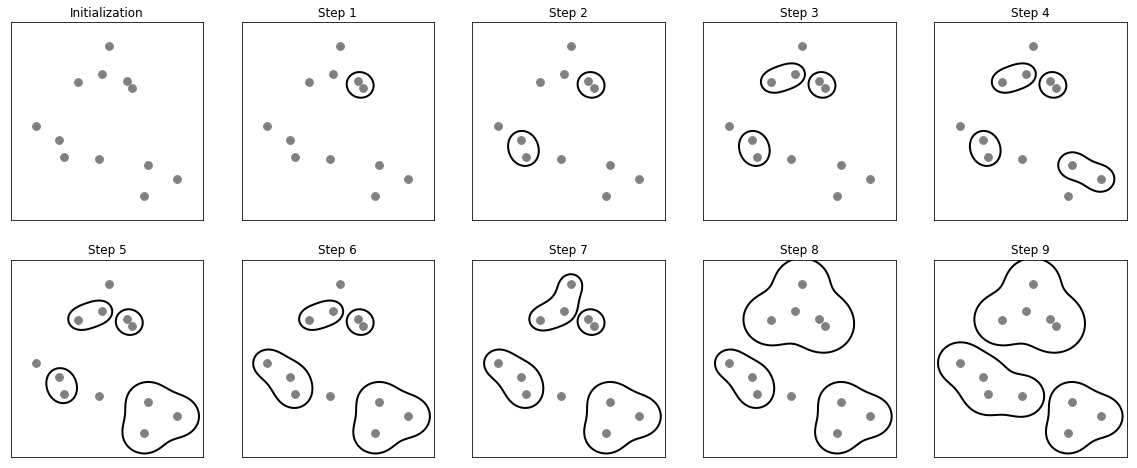

In [24]:
mglearn.plots.plot_agglomerative_algorithm()

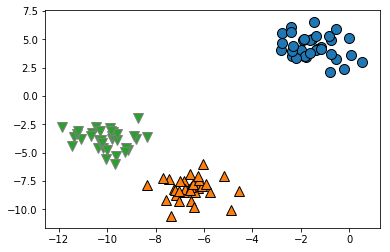

In [25]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
clustering = AgglomerativeClustering(n_clusters=3)
assignment = clustering.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment);

Този алгоритъм също не се оправя добре с `make_moons`:

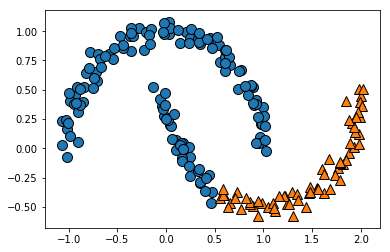

In [26]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

clustering = AgglomerativeClustering(n_clusters=2)
assignment = clustering.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment);

Поради начина си на работа, `AgglomerativeClustering` няма `predict` – той не може да генерализира за нови точки. Има само `fit` и `fit_predict`.

# DBSCAN

* Идва от "Density-Based Spatial Clustering of Applications with Noise"
* Шокиращо, нали?
* Няма нужда да му давате брой клъстери
* Определя някои точки като шум и не ги начислява в клъстър
* Може да открива всякакви форми
* По-бавен

## Как работи?

* Причислява точките в три категории – "core sample", "boundary points" и "noise"
* Два основни параметъра – `eps` и `min_samples`
* Core samples точки с `min_samples` или повече съседи на `eps` или по-малко разстояние.
* Boundary points са точки, които са на `eps` дистанция от core samples, но не са core samples.
* Noise е всичко останало

Повече детайли [в документацията](http://scikit-learn.org/stable/modules/clustering.html#dbscan).

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


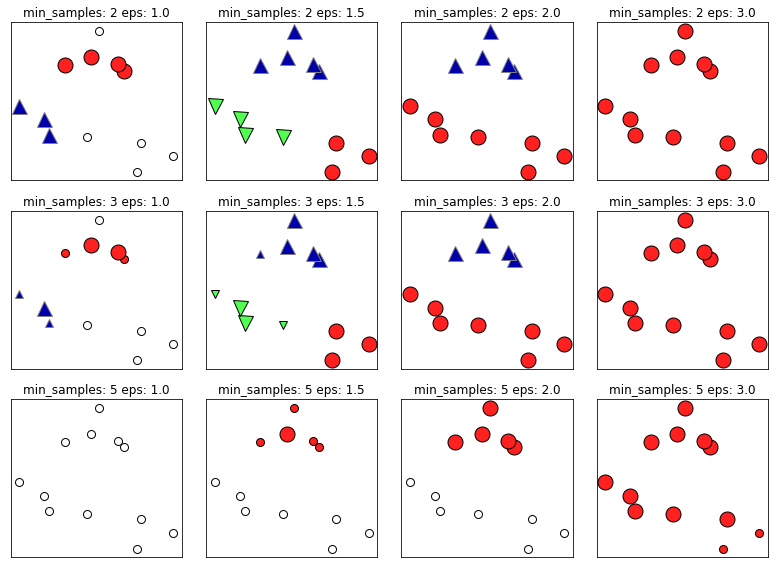

In [27]:
mglearn.plots.plot_dbscan()

DBSCAN вече може да се справи с `make_moons`:

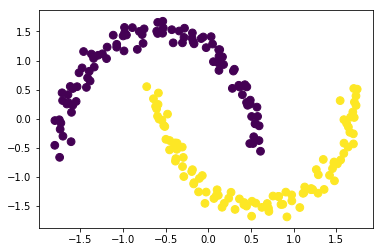

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60);

С подходящия `eps`, DBSCAN може да се справи и онези странни три клъстера от по-рано:

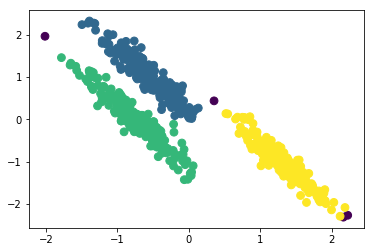

In [29]:
X, y = make_blobs(random_state=170, n_samples=600)
random = np.random.RandomState(74)
transformation = random.normal(size=(2, 2))
X = np.dot(X, transformation)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.20)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60);

Обърнете внимание, че подобно на `AgglomerativeClustering`, `DBSCAN` има само `fit_predict`.

# Сравняване на клъстеризация

Погледнахме за момент `adjusted_rand_score`. Нека видим какво прави:

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score

Ще пробваме пак с `make_moons`:

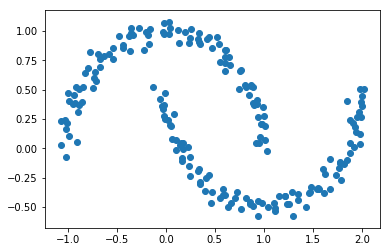

In [31]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.scatter(X[:, 0], X[:, 1]);

Ще видим оценката на тези три алгоритъма:

In [32]:
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

Ще генерираме `random_clusters`, който раздава произволен клъстър на всяка точка:

In [33]:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
random_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

И да начертаем диаграма:

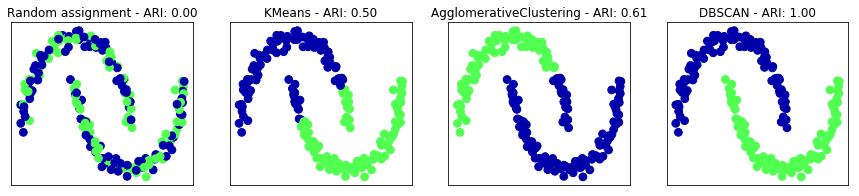

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

# Principal Component Analysis

* Опитва се да намали броя измерения на feature-ите.
* Завърта данните по начин, в който да намери по-малко-мерен линеен базис, който да запазва повечето информация.

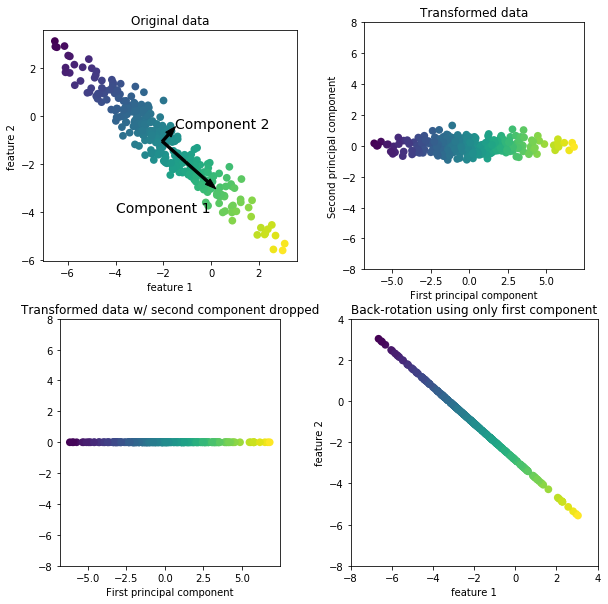

In [35]:
mglearn.plots.plot_pca_illustration()

Бихме могли да го ползваме за визуализация.

Да се опитаме да го приложим върху `cancer`. Първо, нека да видим какви feature-и има:

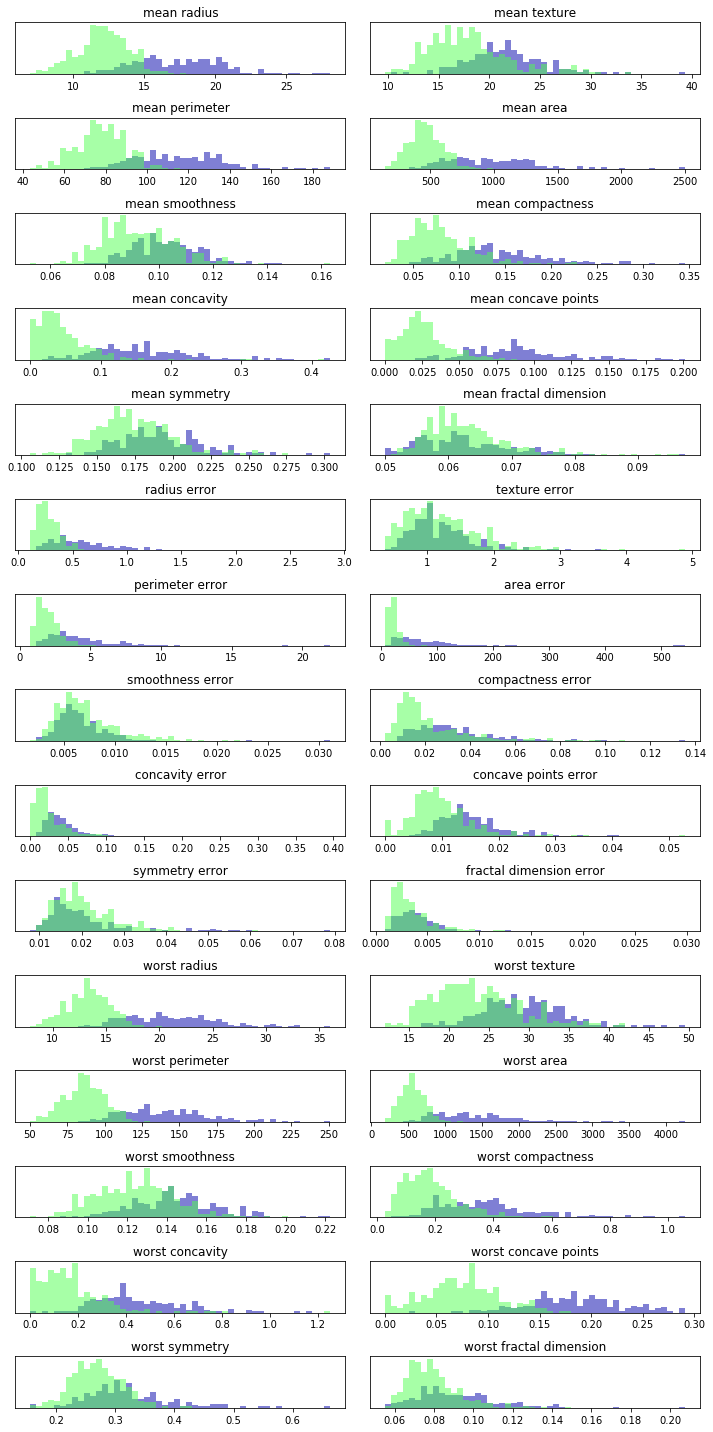

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
fig.tight_layout()

In [37]:
cancer.data.shape

(569, 30)

Преди да го прекараме през PCA е добре да мине през `StandardScaler`:

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

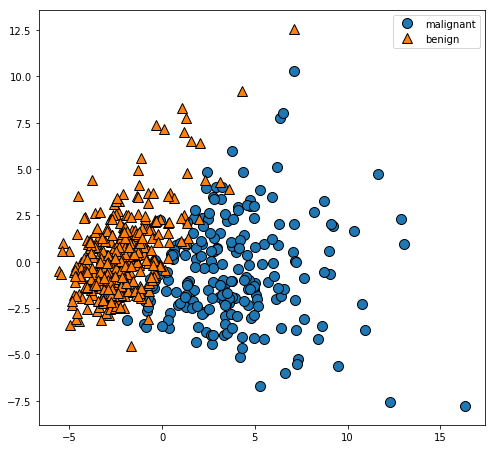

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal');

In [40]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

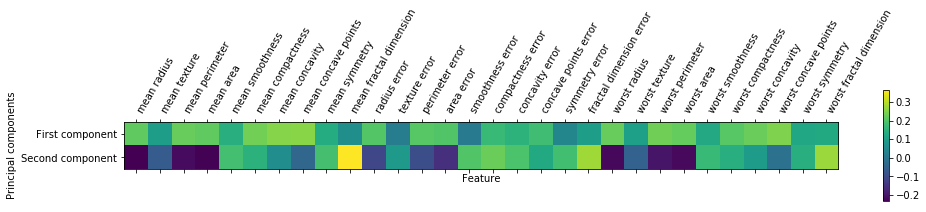

In [41]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

In [42]:
from sklearn.model_selection import cross_val_score

X, y = cancer.data, cancer.target

pipeline = make_pipeline(StandardScaler(), LinearSVC(C=0.01))

cross_val_score(pipeline, X, y).mean()

0.97715585259444904

In [43]:
for i in range(1, 10):
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=i), LinearSVC(C=0.01))
    score = cross_val_score(pipeline, X, y).mean()
    print("Score for {} components: {}".format(i, score))

Score for 1 components: 0.9156688016337139
Score for 2 components: 0.9473127262600948
Score for 3 components: 0.9490392648287385
Score for 4 components: 0.9648565859092174
Score for 5 components: 0.9736470806646246
Score for 6 components: 0.9701197438039544
Score for 7 components: 0.9701197438039544
Score for 8 components: 0.9753829016986911
Score for 9 components: 0.9789102385593614


# Non-negative matrix factorization

Друг алгоритъм, полезен за декомпозиране:

* Работи само с позитивни числа.
* Подходящ където резултатите са сбор от независими променливи (напр. много хора говорещи в една стая).
* Понякога се интерпретира по-лесно от PCA.

Повече информация [в документацията](http://scikit-learn.org/stable/modules/decomposition.html#nmf).

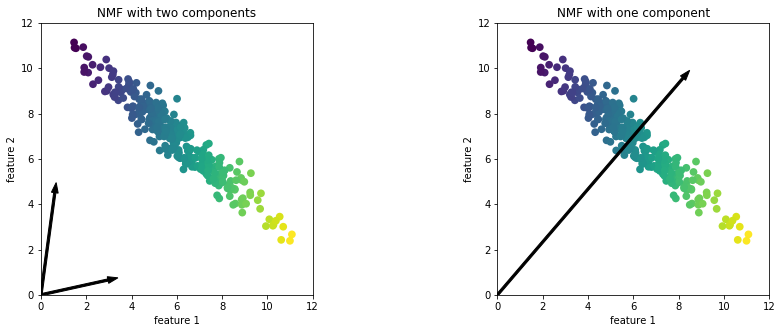

In [44]:
mglearn.plots.plot_nmf_illustration()

## Пример

Декомпозиране на сигнал.

* Имате трима човека, говорещи едновременно в една стая.
* Има n микрофона из стаята, които записват всичко.
* Всеки е на различно място и записва източниците с различна сила.

Може да ползваме NMF да извлечем оригиналните сигнали.

Да генерираме три сигнала:

(2000, 3)

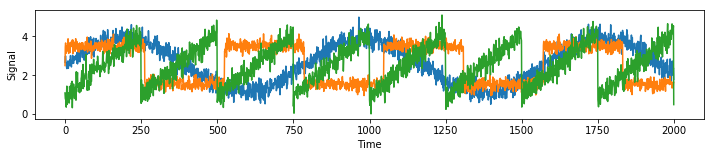

In [45]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(12, 2))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal");
S.shape

Сега ще ги прекараме през 100 микрофона, всеки от които на произволна дистанция от всеки човек:

In [46]:
m = np.random.RandomState(0).uniform(size=(100, 3))
print(m.shape)
m[:5]

(100, 3)


array([[ 0.5488135 ,  0.71518937,  0.60276338],
       [ 0.54488318,  0.4236548 ,  0.64589411],
       [ 0.43758721,  0.891773  ,  0.96366276],
       [ 0.38344152,  0.79172504,  0.52889492],
       [ 0.56804456,  0.92559664,  0.07103606]])

Това е матрица, където редовете са микрофони, а колоните са дистанцията от всеки микрофон.

Извеждаме 100 записа:

In [47]:
X = np.dot(S, m.T)
X.shape

(2000, 100)

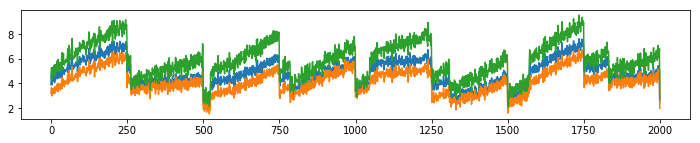

In [48]:
plt.figure(figsize=(12, 2))
plt.plot(X[:, :3], '-');

In [49]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
nmf.fit_transform(X).shape

(2000, 3)

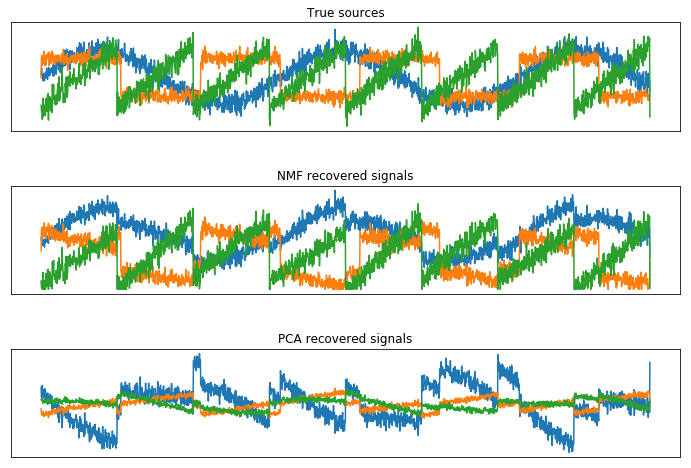

In [50]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)

pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [S, S_, H]
names = ['True sources',
         'NMF recovered signals',
         'PCA recovered signals']
fig, axes = plt.subplots(3, figsize=(12, 8), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

# Визуализация в клъстерите на digits

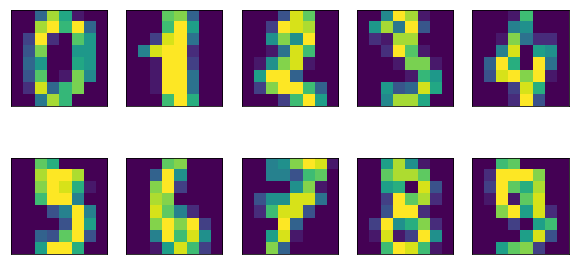

In [51]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Може да пробваме с PCA:

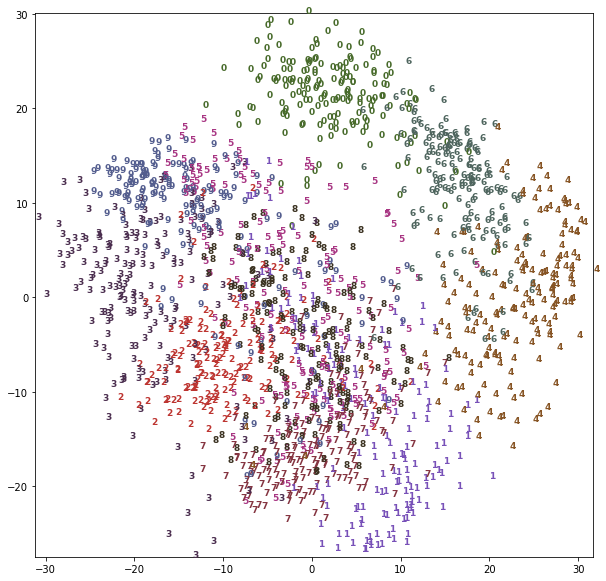

In [52]:
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

Въпреки, че има забележими клъстери от някои числа, `PCA` не се справя идеално.

Може да пробваме TSNE.

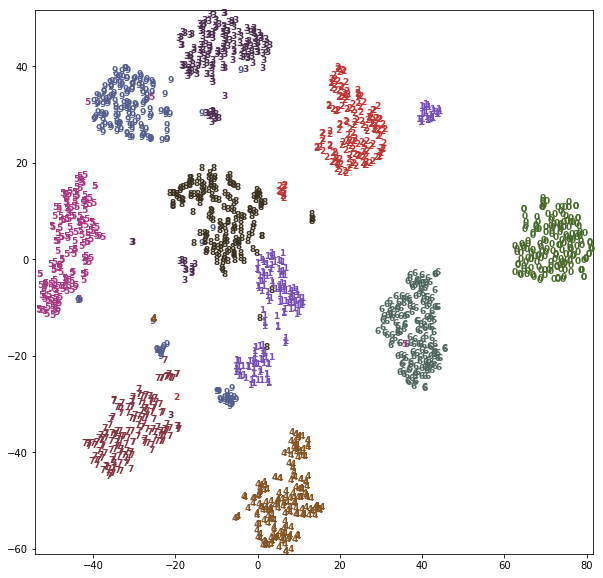

In [53]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)

digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})